In [2]:
from pandas import read_csv
import sys
from google.colab import drive
import pandas as pd
import numpy as np
from numpy import array, argmax
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot
import itertools
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
from sklearn import svm
import pickle

!pip install shap
import shap
# Mount drive (mounts to much higher folder than "My Drive")
drive.mount("/content/drive/")
# This path extension only works when you have our "/Explainable AI Group Work/" folder as a shortcut in "MyDrive"
path = "drive/MyDrive/Explainable AI Group Work/MOOC Model"
sys.path.append(f"{path}/src/") # Add /src/ to path
from svc import SVC
from mlp import MLPClassifier
from data_loader import DataLoader, plot_confusion_matrix

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 2.9 MB/s eta 0:00:00
Mounted at /content/drive/


In [18]:
# Data path
X_train, X_test, y_train, y_test = DataLoader().load(path = f"{path}/data/")
dummy_value = np.array([[1,	0,	0.92,	11000, 32,	197757,	4,	22,	8,	1000]]) # Dummy value (2D Array)
feature_names = ['viewed',	'gender',	'grade', 'nevents', 'ndays_act',	'nplay_video',	'nchapters',	'age',	'votes',	'num_words']
all_classes = all_classes=['Not Completed','Completed']

svc = SVC(from_file = True) # Support Vector Classifier
mlp = MLPClassifier(from_file = True) # Multi-Layer Perceptron Classifier

pred = svc.predict_proba(X_test)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


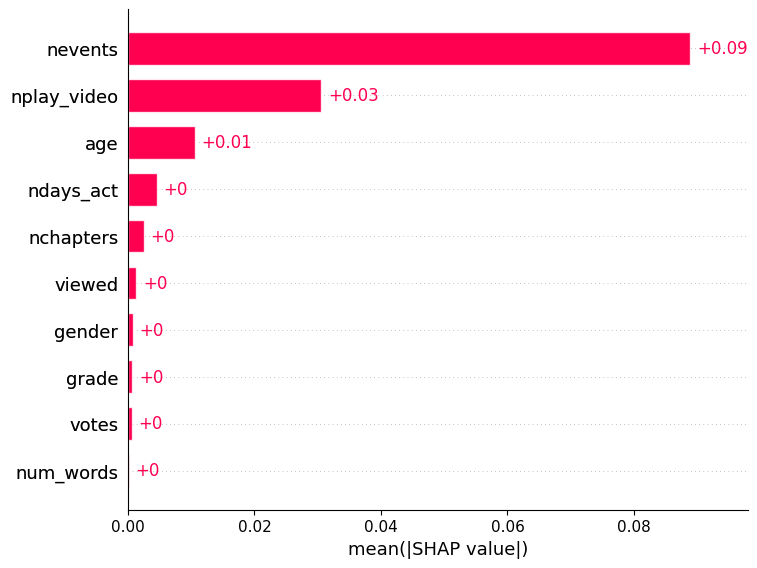

In [13]:
permutation = shap.explainers.Permutation(mlp.predict_proba, X_test, feature_names=feature_names)
# permutation = shap.explainers.Permutation(svc.predict_log_proba, X_test, feature_names=feature_names)
perm_shap_vals = permutation(X_test[:100])[..., 0]
shap.plots.bar(perm_shap_vals)

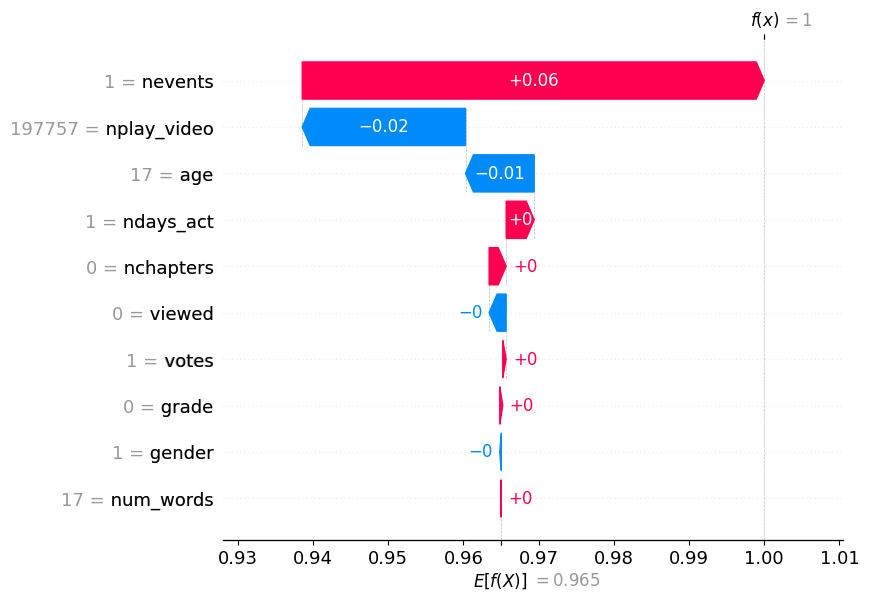

In [14]:
shap.plots.waterfall(perm_shap_vals[0])